In [3]:
import pandas as pd

# Load your datasets
data_23rd = pd.read_csv(r'C:/Users/aidan/codeprojects/ML/ArduinoWineSniffer/src/data_analysis_for_NN/cleaned_data23rd.csv')
data_30th = pd.read_csv(r'C:/Users/aidan/codeprojects/ML/ArduinoWineSniffer/src/data_analysis_for_NN/cleaned_data30th.csv')

# Drop the timestamp column if you don't need it
data_23rd.drop(columns=['yyyy-mm-dd timestamp'], inplace=True)
data_30th.drop(columns=['yyyy-mm-dd timestamp'], inplace=True)

# Add a 'Day' column to distinguish between the datasets
data_23rd['Day'] = '23rd'
data_30th['Day'] = '30th'


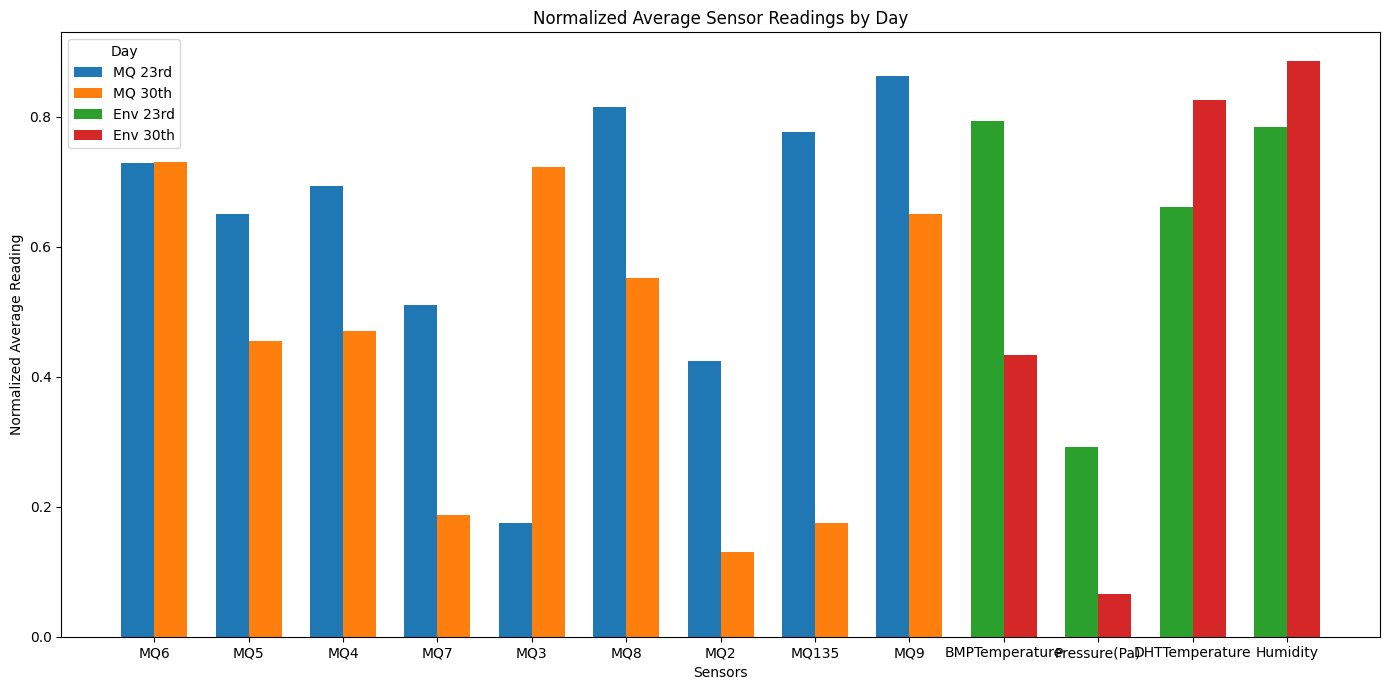

In [8]:
# Combine datasets
from matplotlib import pyplot as plt
import numpy as np


combined_data = pd.concat([data_23rd, data_30th], ignore_index=True)

# Define sensor columns
mq_sensors = ['MQ6', 'MQ5', 'MQ4', 'MQ7', 'MQ3', 'MQ8', 'MQ2', 'MQ135', 'MQ9']
env_sensors = ['BMPTemperature', 'Pressure(Pa)', 'DHTTemperature', 'Humidity']

# Normalize sensor readings
combined_data[mq_sensors] = (combined_data[mq_sensors] - combined_data[mq_sensors].min()) / (combined_data[mq_sensors].max() - combined_data[mq_sensors].min())
combined_data[env_sensors] = (combined_data[env_sensors] - combined_data[env_sensors].min()) / (combined_data[env_sensors].max() - combined_data[env_sensors].min())

# Calculate mean readings for each sensor by day
mean_mq_readings = combined_data.groupby('Day')[mq_sensors].mean().reset_index()
mean_env_readings = combined_data.groupby('Day')[env_sensors].mean().reset_index()

# Create a bar chart for MQ sensors
plt.figure(figsize=(14, 7))

# Set the bar width
bar_width = 0.35
x_mq = np.arange(len(mq_sensors))
x_env = np.arange(len(env_sensors)) + len(mq_sensors)  # Shift environmental sensors to the right

# Plotting MQ sensors
for i, day in enumerate(mean_mq_readings['Day']):
    plt.bar(x_mq + i * bar_width, mean_mq_readings[mq_sensors].iloc[i], width=bar_width, label=f'MQ {day}')

# Plotting environmental sensors
for i, day in enumerate(mean_env_readings['Day']):
    plt.bar(x_env + i * bar_width, mean_env_readings[env_sensors].iloc[i], width=bar_width, label=f'Env {day}')

# Add labels and title
plt.xlabel('Sensors')
plt.ylabel('Normalized Average Reading')
plt.title('Normalized Average Sensor Readings by Day')
plt.xticks(np.concatenate((x_mq, x_env)) + bar_width / 2, list(mq_sensors) + list(env_sensors))
plt.legend(title='Day')
plt.tight_layout()
plt.show()